<a href="https://colab.research.google.com/github/amber41021/school2/blob/main/BUDA535AssignmentM1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amber Pickett
BUDA 535 Assignment 1

Decision Tree

In [ ]:
import pandas as pd

# read training data
train_file = "https://raw.githubusercontent.com/binbenliu/Teaching/main/IntroAI/data/diabetes_train.csv"
train_df = pd.read_csv(train_file, header='infer')

In [ ]:
# read test data
test_file = "https://raw.githubusercontent.com/binbenliu/Teaching/main/IntroAI/data/diabetes_test.csv"
test_df = pd.read_csv(test_file, header='infer')# read test data

In [ ]:
cols = train_df.columns
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
# train data
X_train = train_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y_train = train_df['Outcome'].values

# test data
X_test = test_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y_test = test_df['Outcome'].values

In [ ]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred_tree = clf_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred_tree)))
print('Precision on test data is %.2f' % precision_score(y_test, y_pred_tree) )
print('Recall on test data is %.2f' % recall_score(y_test, y_pred_tree) )
print('F1_score on test data is %.2f' % f1_score(y_test, y_pred_tree) )

Accuracy on test data is 0.74
Precision on test data is 0.68
Recall on test data is 0.51
F1_score on test data is 0.58


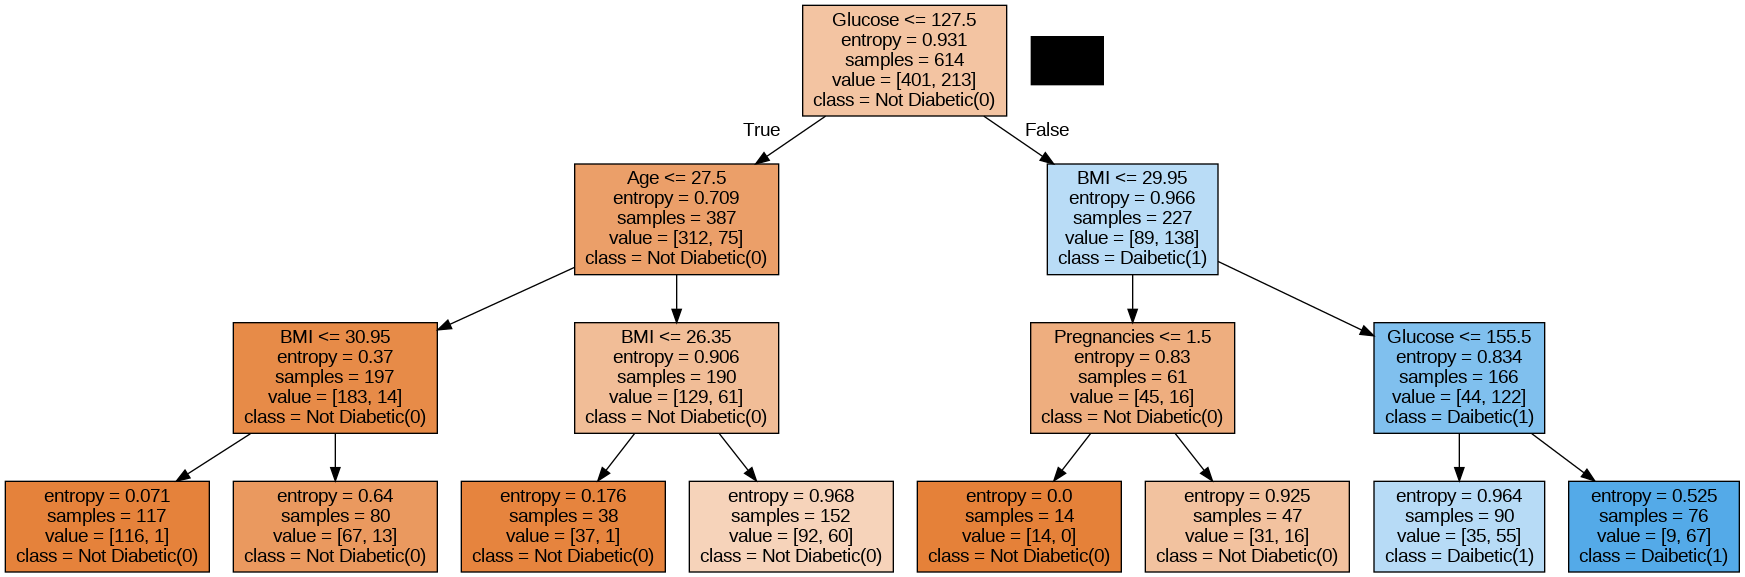

In [ ]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf_tree, feature_names=x_cols, 
                                class_names=['Not Diabetic(0)','Daibetic(1)'], 
                                filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

I chose to limit the max depth to 3 to reduce complexity and improve prediction scores. based on the decision tree, the variable "Glucose" has the strongest predictive power in distinguishing between diabetics and non-diabetics. Answering the questions and following the path leads to a determination of daibeties vs. non-diabetic. Following the orange path is indicative of non-diabetic whereas the blue path is indicative of diabeties. 

Logistic Regression

In [ ]:
import sklearn.linear_model
clf_lr = sklearn.linear_model.LogisticRegression(fit_intercept=True)

In [ ]:
clf_lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr = clf_lr.predict(X_test)

In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred_lr)))
print('Precision on test data is %.2f' % precision_score(y_test, y_pred_lr) )
print('Recall on test data is %.2f' % recall_score(y_test, y_pred_lr) )
print('F1_score on test data is %.2f' % f1_score(y_test, y_pred_lr) )

Accuracy on test data is 0.75
Precision on test data is 0.72
Recall on test data is 0.51
F1_score on test data is 0.60


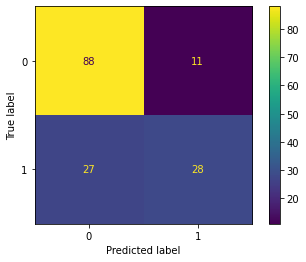

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr, labels=clf_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf_lr.classes_) 
disp.plot()

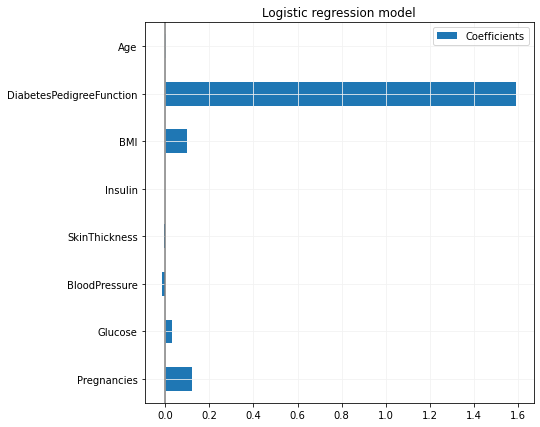

In [ ]:
import matplotlib.pyplot as plt


coefs = pd.DataFrame(
   clf_lr.coef_.ravel(),
   columns=['Coefficients'], index=x_cols
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Logistic regression model')
plt.axvline(x=0, color='0.5')
plt.subplots_adjust(left=.3)
plt.grid( color='0.95')

From this graph, we can see which feautres have the greatest impact on outcome. Specifically, results from DiabetesPedigreeFunction are strongly associated with an an outcome of "1". This trend is followed by pregnancies, BMI, and Glucose (in that order). Additionally, there appears to be a very slight negative association between BloodPressure and outcome. 